In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.utils import reverse_cuthill_mckee_ordering

In [2]:
def get_bandwidth(G):
    L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes())) # Laplacian Matrix
    x,y = np.nonzero(L)
    return (y-x).max()+(x-y).max()+1
    

def print_nodes_info(G):
    print("------------------------------------------")
    for n in sorted(G.nodes()):
        print('Node %d -> id: %s / degree: %d' % (n, G.nodes[n]['id'], G.degree(n)) )
    print("------------------------------------------")


def plot_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.show()

In [3]:
# building graph
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,3),(0,4),(0,5),(6,7),(3,6),(0,8),(6,4),(6,5),(1,3)])

# add ids to nodes
attrs = dict()
for i in range(9):
    attrs[i] = {'id': i}
nx.set_node_attributes(G, attrs)

print_nodes_info(G)

------------------------------------------
Node 0 -> id: 0 / degree: 4
Node 1 -> id: 1 / degree: 3
Node 2 -> id: 2 / degree: 2
Node 3 -> id: 3 / degree: 3
Node 4 -> id: 4 / degree: 2
Node 5 -> id: 5 / degree: 2
Node 6 -> id: 6 / degree: 4
Node 7 -> id: 7 / degree: 1
Node 8 -> id: 8 / degree: 1
------------------------------------------


Bandwidth of G: 17


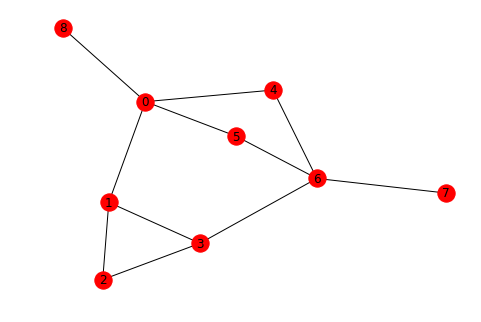

In [4]:
print('Bandwidth of G: %d' % get_bandwidth(G))
plot_graph(G)

Bandwidth of G: 7


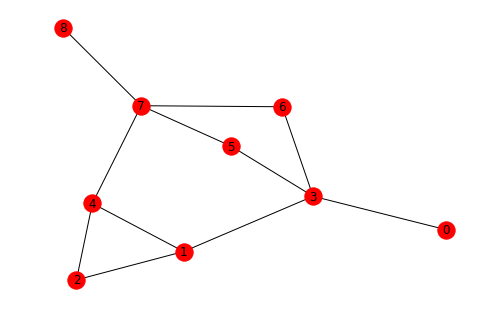

------------------------------------------
Node 0 -> id: 7 / degree: 1
Node 1 -> id: 3 / degree: 3
Node 2 -> id: 2 / degree: 2
Node 3 -> id: 6 / degree: 4
Node 4 -> id: 1 / degree: 3
Node 5 -> id: 5 / degree: 2
Node 6 -> id: 4 / degree: 2
Node 7 -> id: 0 / degree: 4
Node 8 -> id: 8 / degree: 1
------------------------------------------


In [5]:
# relabel nodes using rcm
rcm = list(reverse_cuthill_mckee_ordering(G))
mapping = dict(zip(rcm, G.nodes))
G = nx.relabel_nodes(G, mapping)

print('Bandwidth of G: %d' % get_bandwidth(G))
plot_graph(G)
print_nodes_info(G)